In [0]:
#QUESTION 1

In [0]:
dbutils.fs.ls('FileStore/tables')

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/accounts-1.zip', name='accounts-1.zip', size=5297592, modificationTime=1645612155000),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1645020247000),
 FileInfo(path='dbfs:/FileStore/tables/character_counting.ipynb', name='character_counting.ipynb', size=25386, modificationTime=1646064671000),
 FileInfo(path='dbfs:/FileStore/tables/clinic/', name='clinic/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicT/', name='clinicT/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial/', name='clinicaltrial/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv', name='clinicaltrial_2019_csv', size=42400056, modificationTime=1649237026000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv.gz', name='clinicaltrial_2019_csv.gz', size=10060669, modificationTime=1648992098000),
 FileInfo(

In [0]:
Ctrial='clinicaltrial_2021_csv'

In [0]:
Ctrialfile='clinicaltrial_2021.csv'

In [0]:
#copy data to temp file to unzip
dbutils.fs.cp("FileStore/tables/" + Ctrial +  ".gz", "file:/tmp/")

Out[5]: True

In [0]:
#create a variable in shell to unzip 
import os
os.environ['file'] = Ctrial

In [0]:
%sh
gunzip /tmp/$file

gzip: /tmp/clinicaltrial_2021_csv: unknown suffix -- ignored


In [0]:
#copy from temp to Filestore
dbutils.fs.cp("file:/tmp/" + Ctrial ,"FileStore/tables/"+Ctrialfile)

Out[8]: True

In [0]:
dbutils.fs.ls("FileStore/tables")

Out[9]: [FileInfo(path='dbfs:/FileStore/tables/accounts-1.zip', name='accounts-1.zip', size=5297592, modificationTime=1645612155000),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1645020247000),
 FileInfo(path='dbfs:/FileStore/tables/character_counting.ipynb', name='character_counting.ipynb', size=25386, modificationTime=1646064671000),
 FileInfo(path='dbfs:/FileStore/tables/clinic/', name='clinic/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicT/', name='clinicT/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial/', name='clinicaltrial/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv', name='clinicaltrial_2019_csv', size=42400056, modificationTime=1649237026000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv.gz', name='clinicaltrial_2019_csv.gz', size=10060669, modificationTime=1648992098000),
 FileInfo(

In [0]:
#converting the unzipped data to RDD
unzipRDD = sc.textFile("FileStore/tables/" + Ctrialfile)

In [0]:
unzipRDD.take(8)

Out[11]: ['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|',
 'NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate',
 'NCT02752438|Ankara University|Unknown status|May 2016|Jul 

In [0]:
#viewing the headers
unzipRDD.first()

Out[12]: 'Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions'

In [0]:
#viewing the headers in a new RDD
head=unzipRDD.first()

In [0]:
#removing rdd head
unzipRDD2= unzipRDD.filter(lambda y: y!=head)

In [0]:
unzipRDD2.take(8)

Out[15]: ['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|',
 'NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate',
 'NCT02752438|Ankara University|Unknown status|May 2016|Jul 2017|Observational [Patient Registry]|Apr 2016|Hypoventilation|',
 'NCT02753543|

In [0]:
unzipRDD2.count()


Out[16]: 387261

In [0]:
#QUESTION 2

In [0]:
#SPLITTING RDD
splitunzipRDD = unzipRDD2.map(lambda y: y.split('|'))

In [0]:
splitunzipRDD.take(8)

Out[19]: [['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02758860',
  'University of Roma La Sapienza',
  'Active, not recruiting',
  'Jun 2016',
  'Sep 2020',
  'Observational [Patient Registry]',
  'Apr 2016',
  'Diverticular Diseases,Diverticulum,Diverticulosis',
  ''],
 ['NCT02757209',
  'Consorzio Futuro in Ricerca',
  'Completed',
  'Apr 2016',
  'Jan 2018',
  'Interven

In [0]:
#EXTRACT TYPE COLUMN 
extractRDD=splitunzipRDD.map(lambda y:y[5])

In [0]:
extractRDD.take(8)

Out[21]: ['Interventional',
 'Interventional',
 'Interventional',
 'Observational',
 'Observational [Patient Registry]',
 'Interventional',
 'Observational [Patient Registry]',
 'Interventional']

In [0]:
#Pair RDD
pairRDD=extractRDD.map(lambda y:(y,1))

In [0]:
pairRDD.take(8)

Out[23]: [('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Observational', 1),
 ('Observational [Patient Registry]', 1),
 ('Interventional', 1),
 ('Observational [Patient Registry]', 1),
 ('Interventional', 1)]

In [0]:
#ReduceByKey
RByKeyRDD=pairRDD.reduceByKey(lambda m,n:m+n)

In [0]:
RByKeyRDD.take(8)

Out[25]: [('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Interventional', 301472),
 ('Expanded Access', 69)]

In [0]:
#Changing the position of the keys
RByKeyRDD2=RByKeyRDD.map(lambda m: (m[1],m[0]))

In [0]:
RByKeyRDD2.take(8)

Out[27]: [(77540, 'Observational'),
 (8180, 'Observational [Patient Registry]'),
 (301472, 'Interventional'),
 (69, 'Expanded Access')]

In [0]:
#Arranging in descending order
RByKeyRDD2=RByKeyRDD2.sortByKey(False)


In [0]:
RByKeyRDD2.take(8)

Out[29]: [(301472, 'Interventional'),
 (77540, 'Observational'),
 (8180, 'Observational [Patient Registry]'),
 (69, 'Expanded Access')]

In [0]:
#Returning the key to it's position
RByKeyRDD2=RByKeyRDD2.map(lambda m: (m[1],m[0]))

In [0]:
RByKeyRDD2.take(8)

Out[31]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

In [0]:
#QUESTION 3

In [0]:
spaceRDD=splitunzipRDD.map(lambda y: y[7]).filter(lambda y:y!='')

In [0]:
spaceRDD.take(8)

Out[34]: ['Autistic Disorder,Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis,Lung Diseases,Pulmonary Disease',
 'Diverticular Diseases,Diverticulum,Diverticulosis',
 'Asthma',
 'Hypoventilation',
 'Lymphoma',
 'Myositis']

In [0]:
CommasplitRDD=spaceRDD.flatMap(lambda y: y.split(','))

In [0]:
CommasplitRDD.take(8)

Out[36]: ['Autistic Disorder',
 'Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis',
 'Lung Diseases',
 'Pulmonary Disease',
 'Diverticular Diseases',
 'Diverticulum']

In [0]:
#pairing the rdd
pairRDD2=CommasplitRDD.map(lambda y: (y,1))

In [0]:
pairRDD2.take(8)

Out[38]: [('Autistic Disorder', 1),
 ('Autism Spectrum Disorder', 1),
 ('Diabetes Mellitus', 1),
 ('Tuberculosis', 1),
 ('Lung Diseases', 1),
 ('Pulmonary Disease', 1),
 ('Diverticular Diseases', 1),
 ('Diverticulum', 1)]

In [0]:
reducebykeyRDD=pairRDD2.reduceByKey(lambda m,n: m+n)

In [0]:
reducebykeyRDD.take(8)

Out[40]: [('Autistic Disorder', 867),
 ('Autism Spectrum Disorder', 880),
 ('Tuberculosis', 1118),
 ('Diverticular Diseases', 65),
 ('Diverticulosis', 18),
 ('Asthma', 3089),
 ('Lymphoma', 5395),
 ('Myositis', 108)]

In [0]:
reducebykeyRDD2=reducebykeyRDD.map(lambda y: (y[1], y[0]))

In [0]:
reducebykeyRDD2.take(8)

Out[42]: [(867, 'Autistic Disorder'),
 (880, 'Autism Spectrum Disorder'),
 (1118, 'Tuberculosis'),
 (65, 'Diverticular Diseases'),
 (18, 'Diverticulosis'),
 (3089, 'Asthma'),
 (5395, 'Lymphoma'),
 (108, 'Myositis')]

In [0]:
sortbykeyRDD=reducebykeyRDD2.sortByKey(False)

In [0]:
sortbykeyRDD2=sortbykeyRDD.map(lambda y: (y[1], y[0]))

In [0]:
sortbykeyRDD2.take(5)

Out[45]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

In [0]:
#QUESTION 4

In [0]:
MeshRDD=sc.textFile('/FileStore/tables/mesh.csv')

In [0]:
MeshRDD.take(8)

Out[48]: ['term,tree',
 'Calcimycin,D03.633.100.221.173',
 'A-23187,D03.633.100.221.173',
 'Temefos,D02.705.400.625.800',
 'Temefos,D02.705.539.345.800',
 'Temefos,D02.886.300.692.800',
 'Abate,D02.705.400.625.800',
 'Abate,D02.705.539.345.800']

In [0]:
splitmeshRDD=MeshRDD.map(lambda y: y.split(','))


In [0]:
splitmeshRDD.take(8)

Out[50]: [['term', 'tree'],
 ['Calcimycin', 'D03.633.100.221.173'],
 ['A-23187', 'D03.633.100.221.173'],
 ['Temefos', 'D02.705.400.625.800'],
 ['Temefos', 'D02.705.539.345.800'],
 ['Temefos', 'D02.886.300.692.800'],
 ['Abate', 'D02.705.400.625.800'],
 ['Abate', 'D02.705.539.345.800']]

In [0]:
splitmeshRDD=splitmeshRDD.map(lambda y:(y[0], y[1].split('.')))

In [0]:
splitmeshRDD=splitmeshRDD.map(lambda y:(y[0],y[1][0]))

In [0]:
#joining the disease and its frequency RDD with the root RDD
jointRDD=sortbykeyRDD2.join(splitmeshRDD)

In [0]:
jointRDD=jointRDD.map(lambda y: y[1])

In [0]:
#swapping positions before reduce by key
reducebykeyRDD=jointRDD.map(lambda m : (m[1],m[0]))

In [0]:
reducebykeyRDD.take(8)

Out[56]: [('C23', 8032),
 ('C04', 5395),
 ('C15', 5395),
 ('C20', 5395),
 ('C01', 5323),
 ('F01', 5199),
 ('C18', 3447),
 ('C23', 3447)]

In [0]:
#reducing by key
reducebykeyRDD=reducebykeyRDD.reduceByKey(lambda m,n:m+n)

In [0]:
reducebykeyRDD.take(8)

Out[58]: [('C15', 34571),
 ('C26', 20476),
 ('C09', 8842),
 ('C07', 11980),
 ('G11', 4396),
 ('A11', 267),
 ('C17', 28184),
 ('A07', 204)]

In [0]:
#swapping positions before sort by key
sortbykeyRDD=reducebykeyRDD.map(lambda m : (m[1],m[0]))

In [0]:
sortbykeyRDD.take(8)

Out[60]: [(34571, 'C15'),
 (20476, 'C26'),
 (8842, 'C09'),
 (11980, 'C07'),
 (4396, 'G11'),
 (267, 'A11'),
 (28184, 'C17'),
 (204, 'A07')]

In [0]:
#sorting by key in descending order to get the highest values on top
sortbykeyRDD=sortbykeyRDD.sortByKey(False)

In [0]:
sortbykeyRDD.take(5)

Out[62]: [(143994, 'C04'),
 (136079, 'C23'),
 (106674, 'C01'),
 (94523, 'C14'),
 (92310, 'C10')]

In [0]:
sortbykeyRDD=sortbykeyRDD.map(lambda m : (m[1],m[0]))

In [0]:
sortbykeyRDD.take(5)

Out[64]: [('C04', 143994),
 ('C23', 136079),
 ('C01', 106674),
 ('C14', 94523),
 ('C10', 92310)]

In [0]:
#QUESTION 5

In [0]:
PharmaRDD= sc.textFile('/FileStore/tables/pharma.csv')

In [0]:
PharmaRDD.take(5)

Out[67]: ['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the c

In [0]:
headerrdd=PharmaRDD.first()
PharmaRDD=PharmaRDD.filter(lambda y:y!=headerrdd)

In [0]:
parentRDD=PharmaRDD.map(lambda m : m.replace('"',''))

In [0]:
parentRDD.take(8)

Out[70]: ["Abbott Laboratories,Abbott Laboratories,$5,475,000,$0,$5,475,000,2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.,federal,agency action,Justice Department Civil Division,civil,,,,,,,,,,,,USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians,",
 "Abbott Laboratories Inc.,AbbVie,$1,500,000,000,$0,$1,500,000,000,2012,20120507,healthcare-related offenses,off-label or unapproved promotion of medical products,,Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to pay $1.5 billion to resolve its criminal and civil liability arising from the company's u

In [0]:
parentRDD=parentRDD.map(lambda u: u.split(','))


In [0]:
#extracting parent company
parentRDDmain=parentRDD.map(lambda u: u[1])

In [0]:
parentRDDmain.take(8)

Out[73]: ['Abbott Laboratories',
 'AbbVie',
 'AbbVie',
 ' Inc.',
 'Johnson & Johnson',
 'Abbott Laboratories',
 ' Inc.',
 'Johnson & Johnson']

In [0]:
#distinct variable to remove duplicates
parentRDDmain=parentRDDmain.distinct()

In [0]:
parentRDDmain.count()

Out[75]: 98

In [0]:
#pairing the rdd to remove repeated values
pairparentRDD=parentRDDmain.map(lambda y: (y,1))

In [0]:
#extracting sponsor from clinical data into a new variable 
extractRDD=splitunzipRDD.map(lambda m:m[1])

In [0]:
pairextsponsor=extractRDD.map(lambda u : (u,1))

In [0]:
reducebykeyRDD=pairextsponsor.reduceByKey(lambda m,n:m+n)

In [0]:
reducebykeyRDD.take(5)

Out[80]: [('The University of Hong Kong', 757),
 ('Universidade Federal do Rio de Janeiro', 103),
 ('University of Roma La Sapienza', 289),
 ('Ankara University', 107),
 ('Ruijin Hospital', 200)]

In [0]:
subbykey=reducebykeyRDD.subtractByKey(parentRDDmain)

In [0]:
subbykey.take(8)

Out[82]: [('University of Roma La Sapienza', 289),
 ('Ruijin Hospital', 200),
 ('Washington University School of Medicine', 1374),
 ('Novo Nordisk A/S', 1081),
 ('Medicines for Malaria Venture', 55),
 ('Marmara University', 190),
 ('University of Zurich', 861),
 ('H. Lundbeck A/S', 190)]

In [0]:
subbykey=subbykey.map(lambda h: (h[1], h[0]))

In [0]:
subbykey.take(5)

Out[84]: [(289, 'University of Roma La Sapienza'),
 (200, 'Ruijin Hospital'),
 (1374, 'Washington University School of Medicine'),
 (1081, 'Novo Nordisk A/S'),
 (55, 'Medicines for Malaria Venture')]

In [0]:
sortbykey2=subbykey.sortByKey(False)


In [0]:
sortbykey2.take(10)

Out[86]: [(3378, 'GlaxoSmithKline'),
 (3218, 'National Cancer Institute (NCI)'),
 (2691, 'AstraZeneca'),
 (2645, 'Pfizer'),
 (2414, 'M.D. Anderson Cancer Center'),
 (2369, 'Assistance Publique - Hôpitaux de Paris'),
 (2300, 'Mayo Clinic'),
 (2243, 'Merck Sharp & Dohme Corp.'),
 (2154, 'Assiut University'),
 (2088, 'Novartis Pharmaceuticals')]

In [0]:
subbykey2=sortbykey2.map(lambda h: (h[1], h[0]))

In [0]:
subbykey2.take(10)

Out[88]: [('GlaxoSmithKline', 3378),
 ('National Cancer Institute (NCI)', 3218),
 ('AstraZeneca', 2691),
 ('Pfizer', 2645),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088)]

In [0]:
#QUESTION 6

In [0]:
clinicalt = '2021'

In [0]:
RDDlatest=splitunzipRDD.filter(lambda u : u[2] == 'Completed').map(lambda y: y[4]).map(lambda y: y.split (" "))
RDDlatest.take(8)                                                      

Out[91]: [['Jul', '2020'],
 ['Jan', '2018'],
 ['Dec', '2014'],
 ['Jan', '2018'],
 ['Jul', '2017'],
 ['Jan', '2021'],
 ['Oct', '2016'],
 ['Dec', '2015']]

In [0]:
RDDlatest=RDDlatest.filter(lambda z : z[-1]==clinicalt).map(lambda y: (y[0], 1))
RDDlatest.take(8) 

Out[92]: [('Jan', 1),
 ('Jun', 1),
 ('Mar', 1),
 ('Jan', 1),
 ('May', 1),
 ('Feb', 1),
 ('Feb', 1),
 ('May', 1)]

In [0]:
RDDlatestmain=RDDlatest.reduceByKey(lambda e,d:e+d)
RDDlatestmain.take(8)

Out[93]: [('May', 984),
 ('Jan', 1131),
 ('Jun', 1094),
 ('Mar', 1227),
 ('Feb', 934),
 ('Aug', 700),
 ('Apr', 967),
 ('Jul', 819)]

In [0]:
subbykey3=RDDlatestmain.map(lambda y: (y[1], y[0]))
subbykey3.take(8)

Out[94]: [(984, 'May'),
 (1131, 'Jan'),
 (1094, 'Jun'),
 (1227, 'Mar'),
 (934, 'Feb'),
 (700, 'Aug'),
 (967, 'Apr'),
 (819, 'Jul')]

In [0]:
sortbykey4=subbykey3.sortByKey()
sortbykey4.take(8)

Out[95]: [(187, 'Oct'),
 (528, 'Sep'),
 (700, 'Aug'),
 (819, 'Jul'),
 (934, 'Feb'),
 (967, 'Apr'),
 (984, 'May'),
 (1094, 'Jun')]

In [0]:
subbykey5=sortbykey4.map(lambda y: (y[1], y[0]))
subbykey5.take(10)

Out[96]: [('Oct', 187),
 ('Sep', 528),
 ('Aug', 700),
 ('Jul', 819),
 ('Feb', 934),
 ('Apr', 967),
 ('May', 984),
 ('Jun', 1094),
 ('Jan', 1131),
 ('Mar', 1227)]

Out[97]: <BarContainer object of 10 artists>

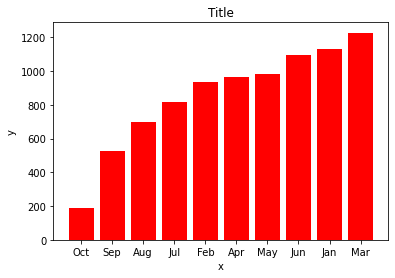

In [0]:
import matplotlib.pyplot as mplot
k= subbykey5.map(lambda f: f[0]).collect()
l= subbykey5.map(lambda f: f[1]).collect()
mplot.xlabel('x')
mplot.ylabel('y')
mplot.title('Title')
mplot.bar(k,l, color = 'red')

In [0]:
print(mplot.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Out[99]: <BarContainer object of 10 artists>

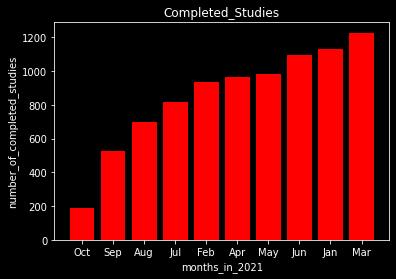

In [0]:
mplot.style.use('dark_background')
mplot.xlabel('months_in_2021')
mplot.ylabel('number_of_completed_studies')
mplot.title('Completed_Studies')
mplot.bar(k,l, color = 'red')